<a href="https://colab.research.google.com/github/Ronaldvarela852/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_json('/content/drive/MyDrive/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
customer = pd.json_normalize(df['customer'], sep=':')


In [5]:
phone = pd.json_normalize(df['phone'], sep=':')


In [6]:
internet = pd.json_normalize(df['internet'], sep=':')

In [7]:
account = pd.json_normalize(df['account'], sep=':')

In [8]:
customerID = df['customerID']

In [9]:
Churn	= df['Churn']

In [10]:
df_normalizado = [customerID, Churn, customer, phone, internet, account]

In [11]:
df_concatenado = pd.concat(df_normalizado, ignore_index=False, axis=1)
df_concatenado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges:Monthly,Charges:Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
df=df_concatenado

In [14]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges:Monthly',
       'Charges:Total'],
      dtype='object')

In [15]:
df.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges:Monthly,Charges:Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#🔧 Transformación

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [17]:
valores_ausentes = df.isnull().sum()
print("Valores ausentes por columna:\n", valores_ausentes)

Valores ausentes por columna:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges:Monthly     0
Charges:Total       0
dtype: int64


In [18]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


In [19]:
df['Charges:Monthly']

,Charges:Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [20]:
df['Charges:Monthly'] = df['Charges:Monthly'].astype(float)

In [21]:
df['Charges:Total']=pd.to_numeric(df['Charges:Total'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [23]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [24]:
df['Churn'] = df['Churn'].str.strip()

In [25]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [26]:
df['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df.describe()

,SeniorCitizen,tenure,Charges:Monthly,Charges:Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


In [28]:
Cuentas_Diarias = (df['Charges:Monthly']/30).rename('Cuentas Diarias')
Cuentas_Diarias

,Cuentas Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [29]:
Cuentas_Diarias

,Cuentas Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


#📊 Carga y análisis

##Distribución de la evasión

In [30]:
# Contar frecuencia de cada categoría
Churn_Counts = df['Churn'].value_counts()

In [31]:
def distribucion_evasion_barras():
  # Crear gráfico de barras
  plt.figure(figsize=(6, 4))
  Churn_Counts.plot(kind='bar', color=['#00b894', '#c0392b'])

  plt.title('Distribución de Evasión de Clientes')
  plt.xlabel('¿Se dio de baja?')
  plt.ylabel('Cantidad de clientes')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  return plt


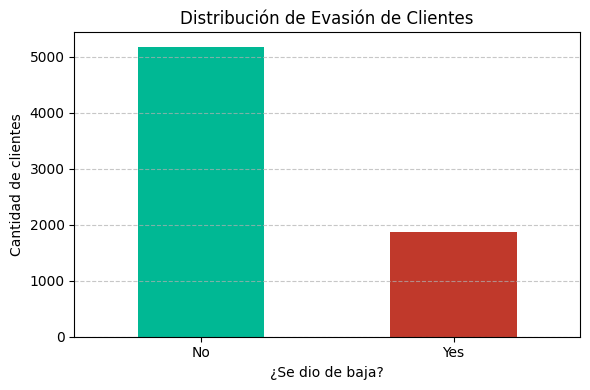

In [32]:
distribucion_evasion_barras().show()

In [33]:
# Guardar gráfico de barras
grafico_distribucion_evasion_barras = distribucion_evasion_barras()
grafico_distribucion_evasion_barras.savefig('distribucion_evasion_barras.png', bbox_inches='tight')
grafico_distribucion_evasion_barras.close()

In [34]:
def distribucion_evasion_torta():
  plt.figure(figsize=(6, 6))
  Churn_Counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#00b894', '#c0392b'])

  plt.title('Proporción de Clientes con y sin Evasión')
  plt.ylabel('')
  plt.tight_layout()
  return plt

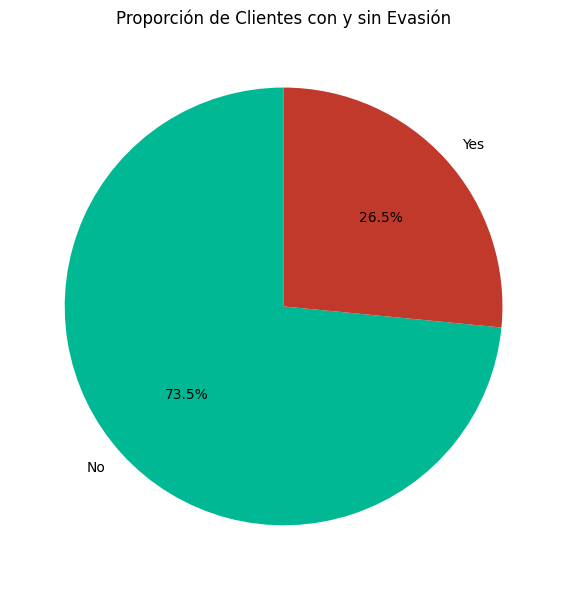

In [35]:
distribucion_evasion_torta().show()

In [36]:
# Guardar gráfico de torta
grafico_distribucion_evasion_torta = distribucion_evasion_torta()
grafico_distribucion_evasion_torta.savefig('distribucion_evasion_torta.png', bbox_inches='tight')
grafico_distribucion_evasion_torta.close()

##Analisis de evasión segun variables categóricas

In [37]:
def graficos_variables_categoricas():
  colores_personalizados = {
      'No': '#00b894',
      'Yes': '#c0392b'
  }

  # Lista de variables categóricas a analizar
  variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'Dependents', 'TechSupport']
  nombres_es = {
      'gender': 'Género',
      'Contract': 'Tipo de Contrato',
      'PaymentMethod': 'Método de Pago',
      'InternetService': 'Tipo de Internet',
      'Dependents': 'Tiene Dependientes',
      'TechSupport': 'Soporte Técnico'
  }

  # Iterar y graficar cada variable
  for var in variables:
      plt.figure(figsize=(8, 5))
      sns.countplot(data=df, x=var, hue='Churn', palette=colores_personalizados)
      plt.title(f'Evasión por {nombres_es[var]}')
      plt.xlabel('')
      plt.ylabel('Cantidad de clientes')
      plt.xticks(rotation=30, ha='right')
      plt.legend(title='Evasión', labels=['No evadieron', 'Sí evadieron'])
      plt.savefig(f'graficos_categoricos_{var}.png', bbox_inches='tight')
      plt.tight_layout()
  return plt

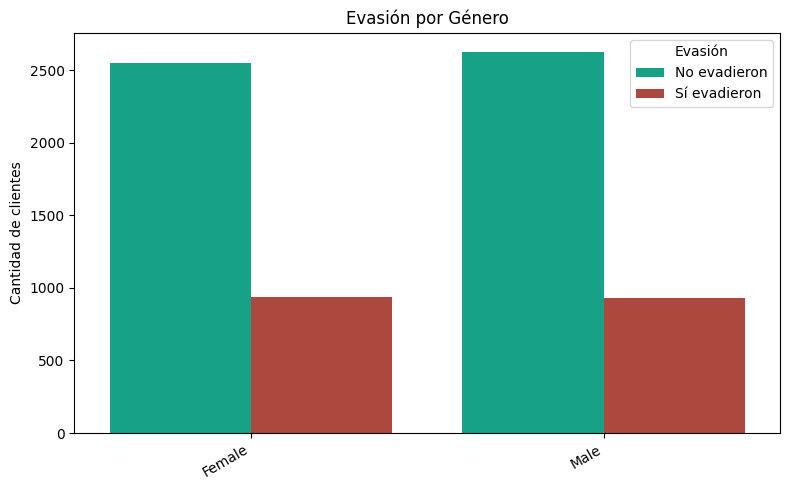

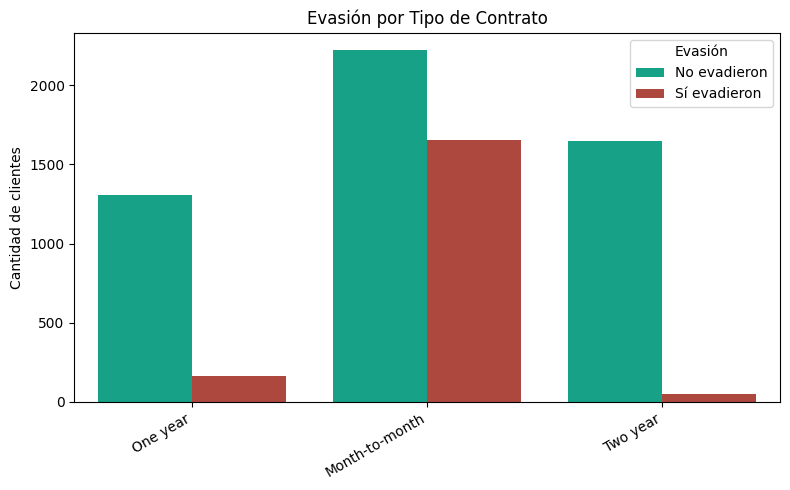

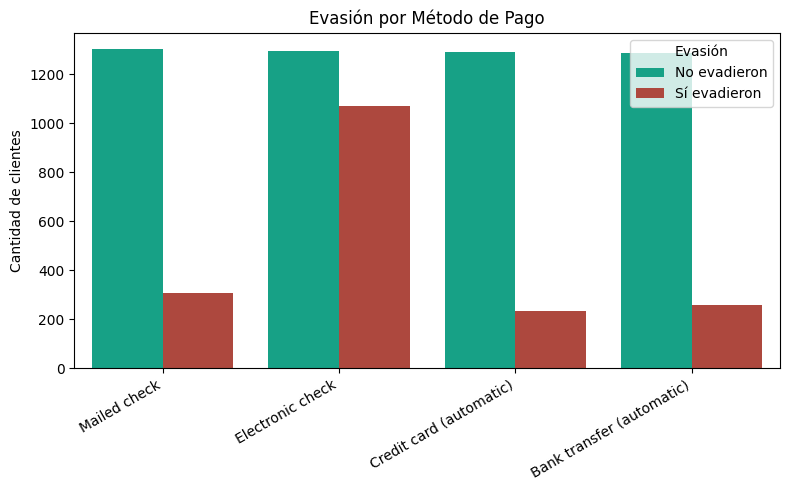

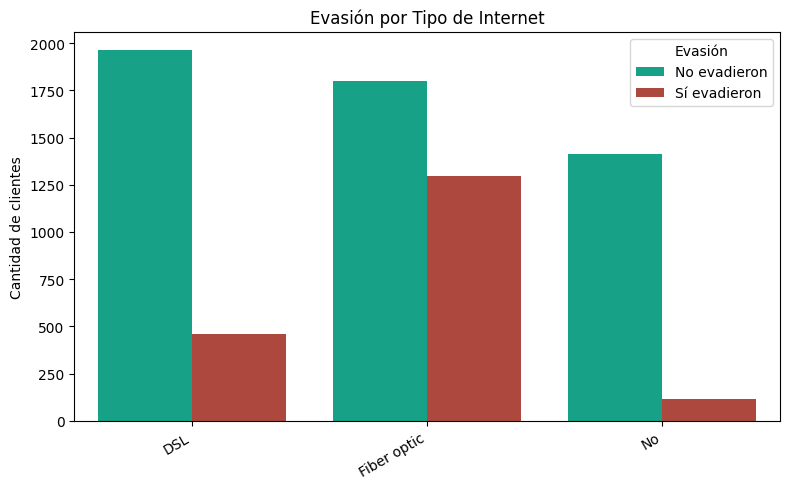

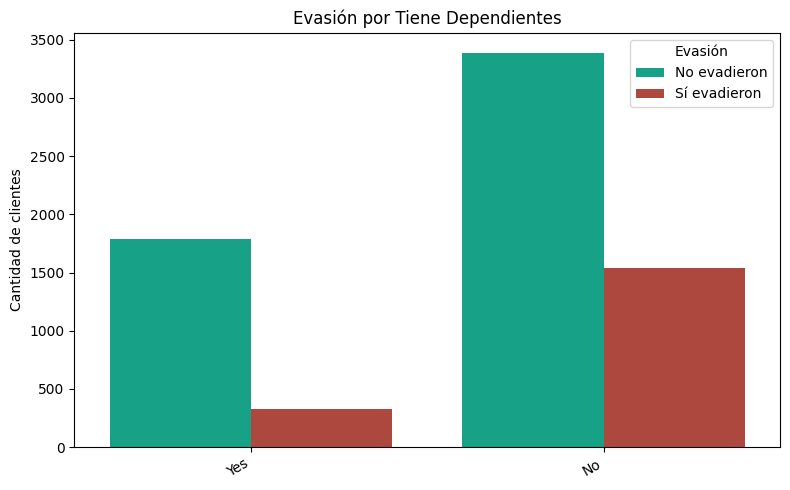

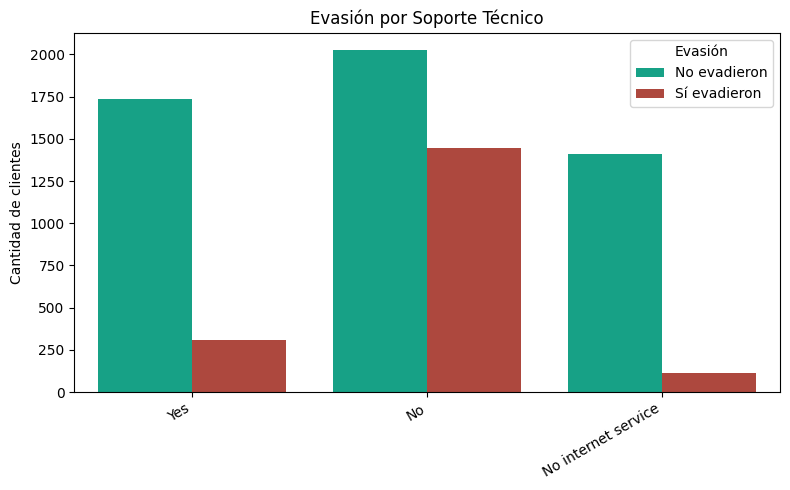

In [38]:
graficos_variables_categoricas().show()


##Analisis de evasión por variables numéricas

In [42]:
def graficos_variables_numericas():
  # Paleta para la variable Churn
  colores_personalizados = {
      'No': '#00b894',
      'Yes': '#c0392b'
  }

  # Lista de variables numéricas
  variables_numericas = ['tenure', 'Charges:Monthly', 'Charges:Total']
  variables_numericas_es = {
      'tenure': 'Antigüedad',
      'Charges:Monthly': 'Cargos Mensuales',
      'Charges:Total': 'Cargos Totales'
  }


  # Gráficos comparativos
  for var in variables_numericas:
      plt.figure(figsize=(10, 5))

      # Boxplot
      plt.subplot(1, 2, 1)
      sns.boxplot(data=df, x='Churn', hue='Churn', y=var, palette=colores_personalizados, legend=False)
      plt.title(f'{variables_numericas_es[var]} por Evasión')
      plt.xlabel('Evasión')
      plt.ylabel(variables_numericas_es[var])

      # Histograma
      plt.subplot(1, 2, 2)
      sns.histplot(data=df, x=var, hue='Churn', palette=colores_personalizados, kde=True, element='step', stat='density', common_norm=False)
      plt.title(f'Distribución de {variables_numericas_es[var]} según Evasión')
      plt.xlabel(variables_numericas_es[var])
      plt.ylabel('Densidad')
      plt.savefig(f'graficos_numericos_{var}.png', bbox_inches='tight')
      plt.tight_layout()
  return plt


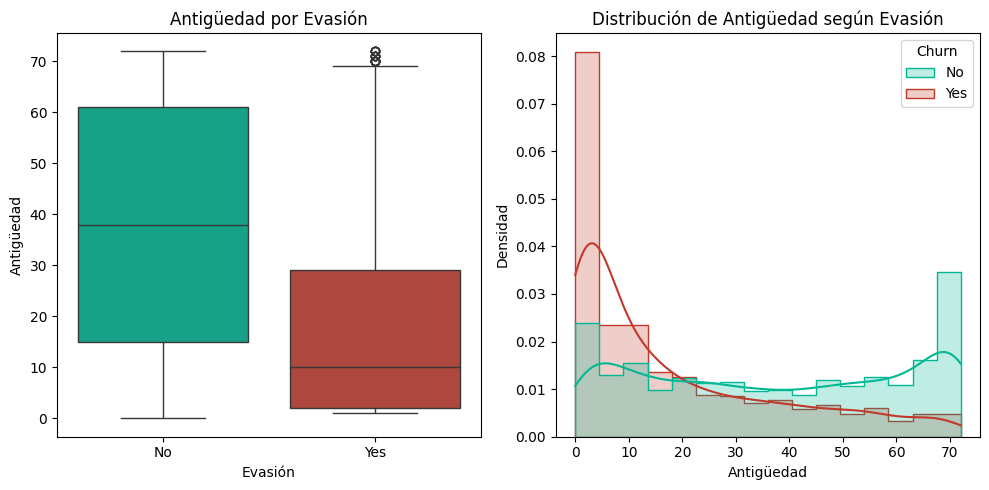

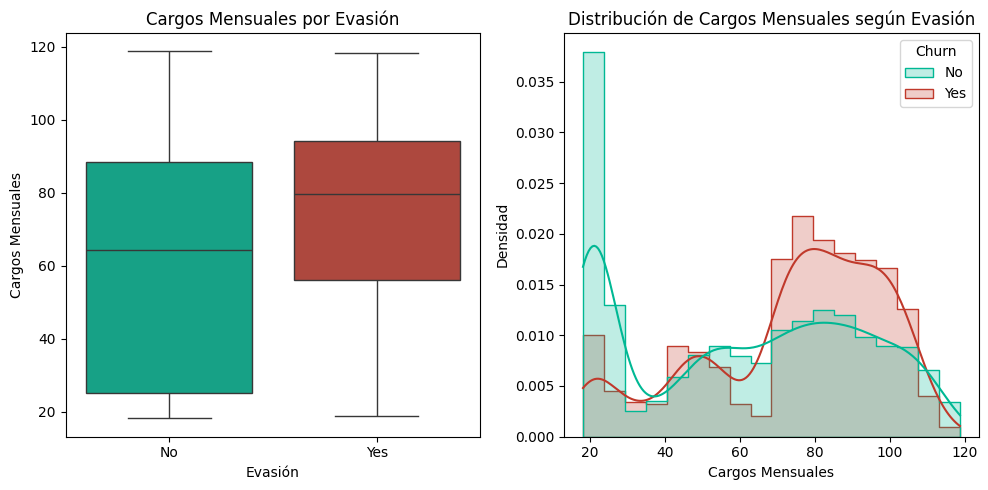

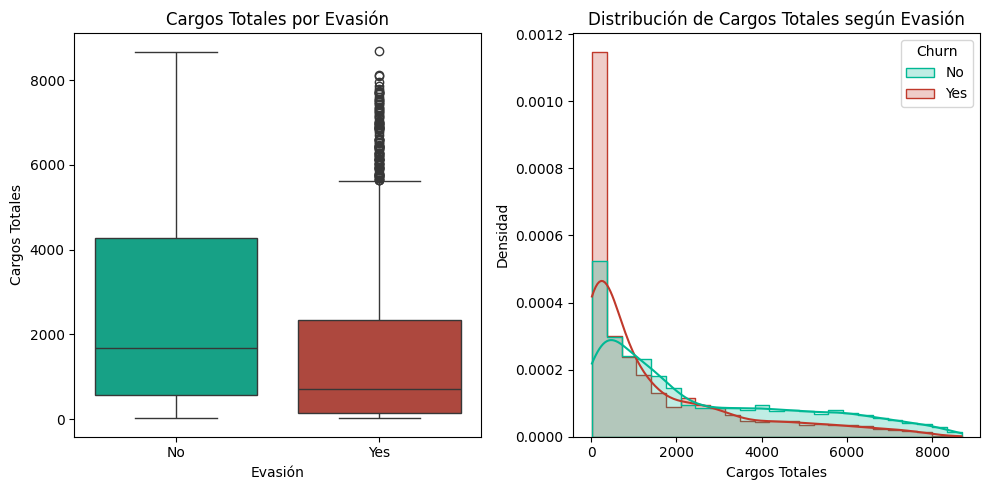

In [43]:
graficos_variables_numericas().show()

#📄Informe final

# 📊 Informe Final: Análisis de Evasión de Clientes en Telecom X

## Introducción

La empresa **Telecom X** enfrenta un problema crítico: una alta tasa de **evasión de clientes** (churn), lo cual impacta directamente en sus ingresos y sostenibilidad. Este proyecto tiene como objetivo **analizar los datos de clientes** para comprender los factores que inciden en la cancelación del servicio, apoyando la toma de decisiones estratégicas basadas en datos.

---

## Limpieza y Tratamiento de Datos

Durante esta etapa, se realizaron los siguientes pasos:

- ✅ Importación del dataset desde una fuente externa.
- ✅ Normalizacion de las columnas con datos anidados
- ✅ Revisión de tipos de datos y conversión de variables.
- ✅ Tratamiento de valores nulos o inconsistencias (como filas de `Total:Charges` en blanco).
- ✅ Revisión de valores unicos y corrección de valores en blanco a NaN en la columna Churn.
- ✅ Creación de una paleta de colores personalizada para mejorar la visualización y facilitar la interpretación.
- ✅ Chequeo de la existencia de valores ausentes o duplicados
- ✅ Creación de la variable Cuentas_Diarias.

Estos pasos aseguraron que el DataFrame estuviera limpio y listo para un análisis confiable.

---

## Análisis Exploratorio de Datos

### 🧩 Distribución de Evasión
- Se observó que aproximadamente **el 26,5% de los clientes se evaden**. Esta informacion resalta en gran medida la necesidad urgente de intervenir de manera adecuada para solventar este inconveniente.

|||
|---|---|
|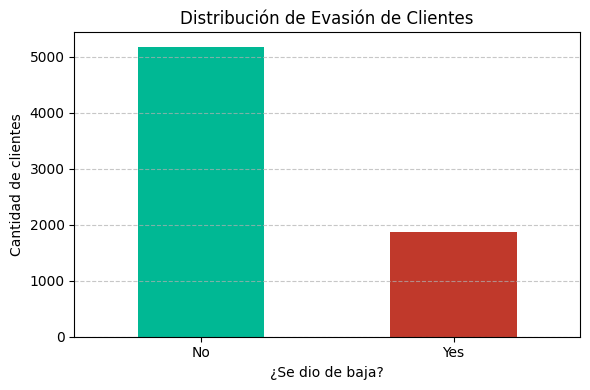|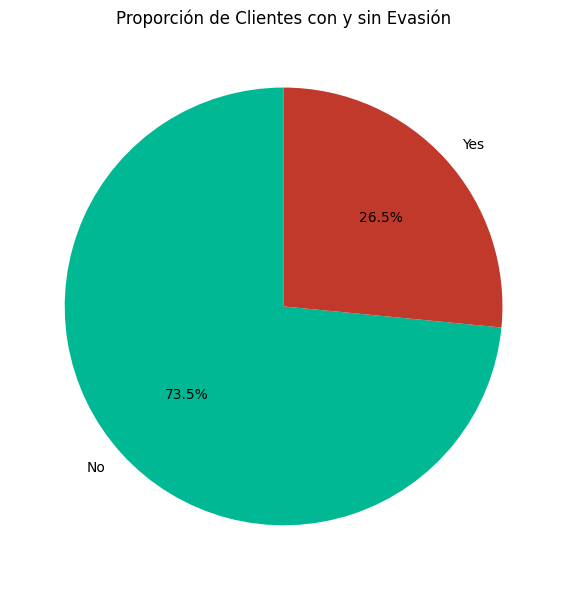|

### 🔍 Variables Categóricas vs. Evasión
A través de gráficos de barras se identificaron tendencias importantes:

- **Tipo de Contrato**: Los contratos **mensuales** concentran la mayoría de los casos de evasión.



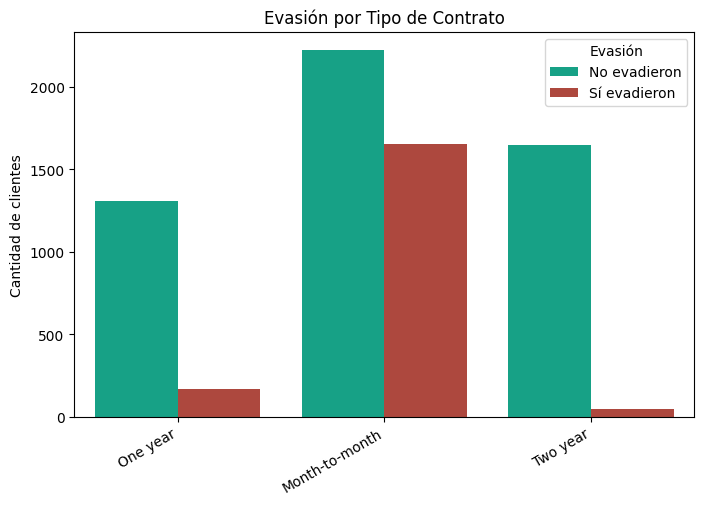


- **Método de Pago**: El uso de **cheque electrónico** tiene una mayor proporción de churn.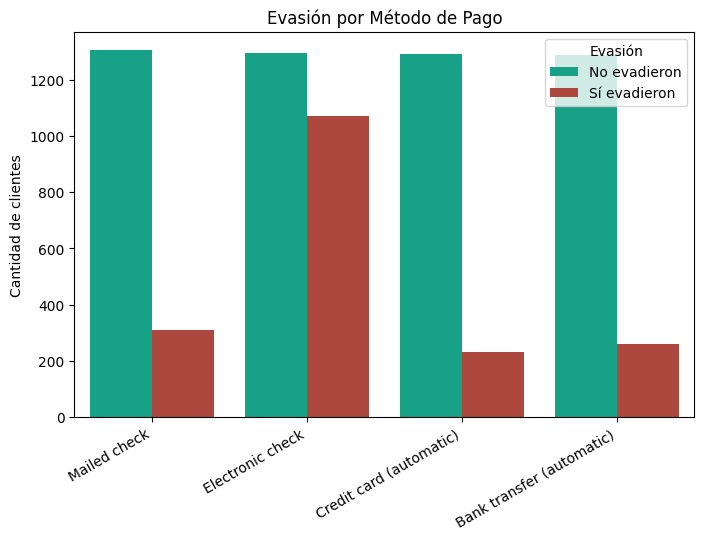

- **Soporte Técnico** y **Dependientes**: Los clientes **sin soporte** y **sin dependientes** evaden con mayor frecuencia.


|||
|---|---|
|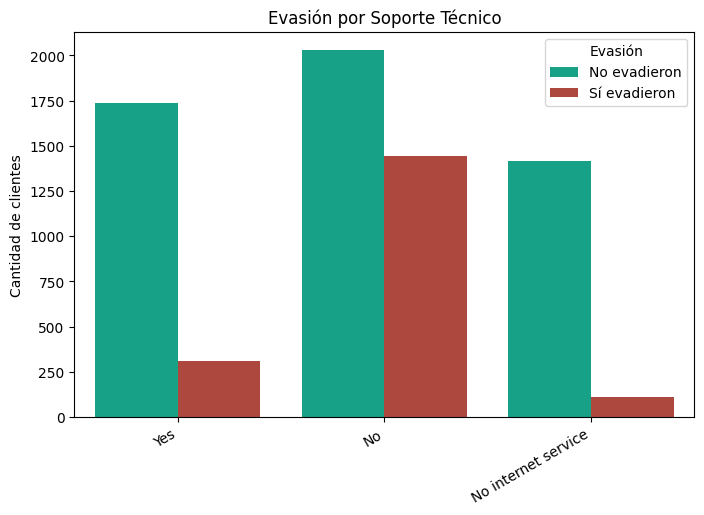|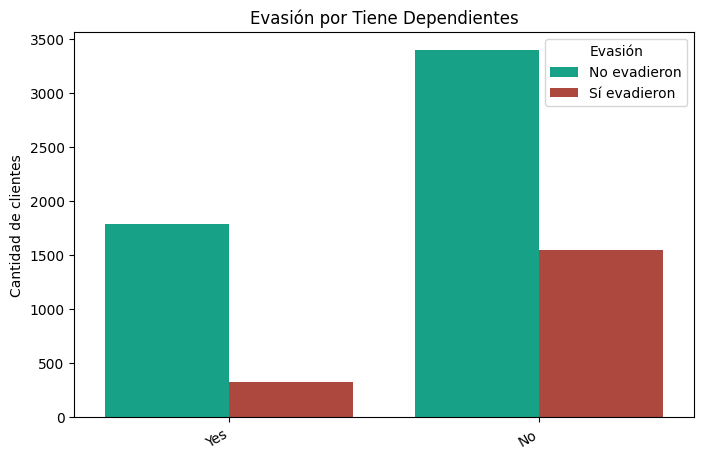|

- **Género**: Los clientes en cuanto al **género** no se observan discrepancias en el abandono, ambos ocupan una proporción equitativa por lo que las razones del abandono no corresponden a orientación masculina/femenina.

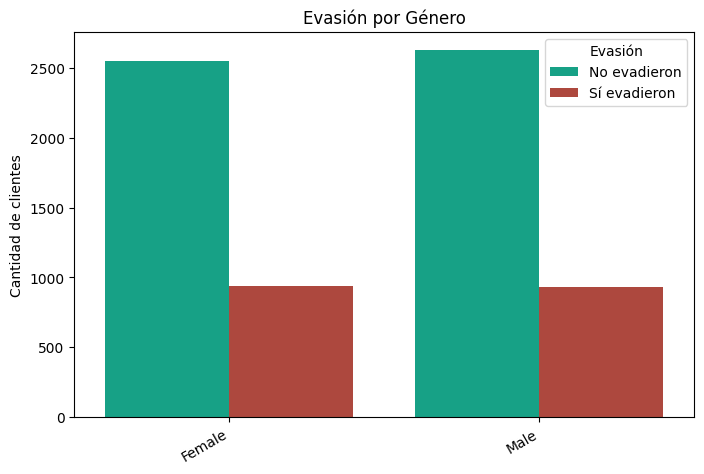

- **Tipo de internet**: En el caso de la **Evasión por tipo de Internet**, si resulta curioso que los clientes con mayor evasión correspondan a **Fibra Optica**, esto a pesar de ser la ultima tecnologia en cuanto a velocidad se refiere, sin embargo, podria deberse a que la mayor proporción de clientes pueda encontrarse en este tramo.

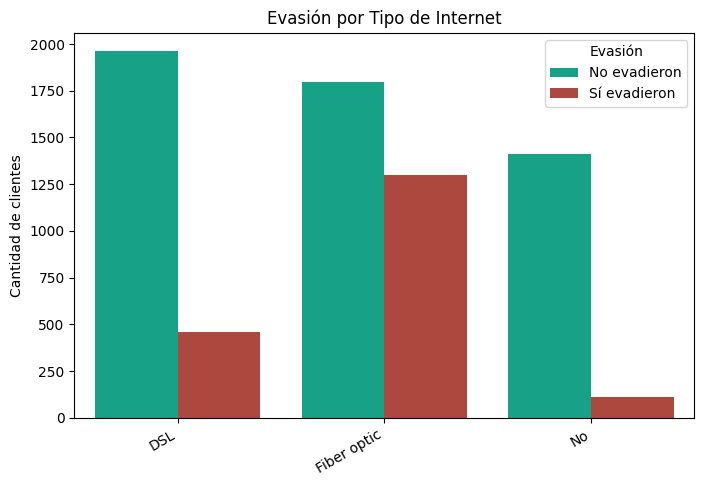

### 📈 Variables Numéricas vs. Evasión
Se utilizaron gráficos de caja e histogramas para analizar:

- **Tenure**: Los clientes que se evaden tienen **menor antigüedad**. Es importante resaltar que la mediana de los clientes que evaden se encuentra en diez (10) meses en contraposicion a los que no evaden que corresponde a sesenta (60) aprox., en ese sentido, es imprescindible generar mecanismos para mantener a los clientes a largo plazo e incentivos para establecer contratos superiores a un(1) año.

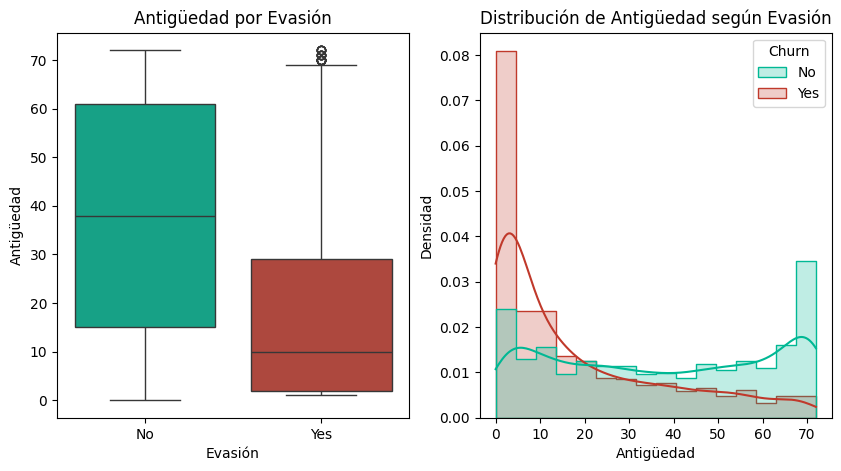

- **Monthly Charges**: Aquellos que pagan **más mensualmente** tienden a cancelar el servicio. En correspondencia con lo indicado previamente, se deben analizar los beneficios de los contratos y reorientarlos para que sean mas equitativos, disminuir algunos costos que no impliquen desmejorar el servicio, a su vez fortalecer las ventas con determinados incentivos para masificar el ingreso, en especial a largo plazo.

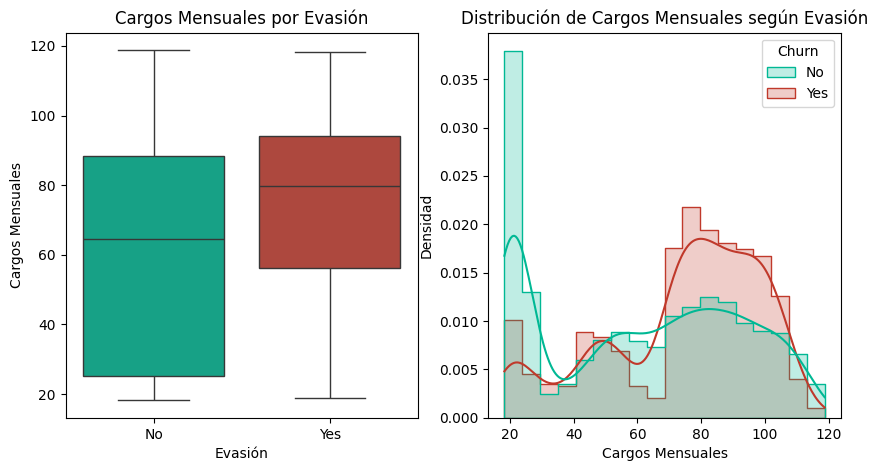

- **Total Charges**: Los clientes que permanecen han invertido más a lo largo del tiempo. Este punto particular, refuerza la informacion en cuanto a los contratos a largo plazo y acentuar los beneficios de este, limitar los contratos Month-to-Month o evaluar la opcion de eliminarlos progresivamente, sustituyendolos por otros con mayor estabilidad futura.

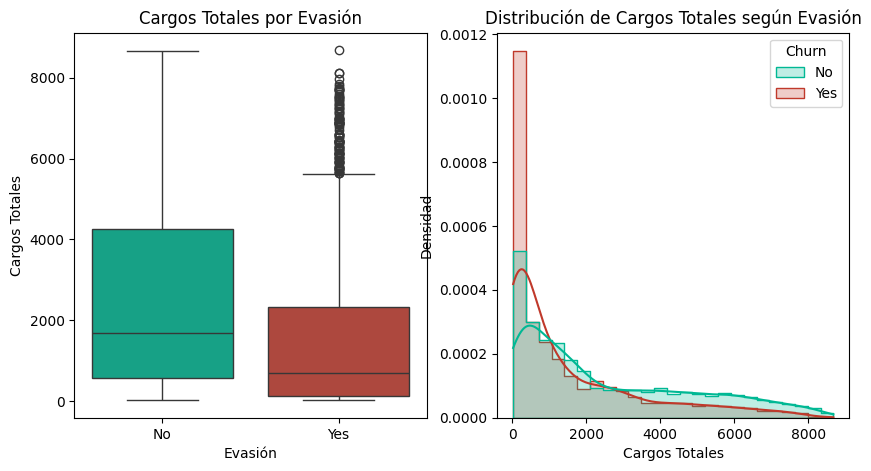



---

## Conclusiones e Insights

- Los clientes **nuevos y con contratos mensuales** son los más propensos a evadir.
- Un **mayor costo mensual** parece estar asociado con mayor insatisfacción.
- Los **métodos de pago tradicionales** (como cheque) tienen tasas de churn más altas.
- La **falta de soporte técnico** puede estar contribuyendo a una mala experiencia del cliente.

Estos insights permiten identificar **segmentos de alto riesgo** y puntos de mejora en la experiencia del usuario.

---

## 🔹 Recomendaciones

1. **Incentivar contratos de largo plazo** (anual o bienal) mediante descuentos o beneficios exclusivos.
2. **Rediseñar la estrategia de soporte técnico**, especialmente para clientes nuevos.
3. **Promover métodos de pago automáticos y modernos** (tarjetas, transferencias).
4. Implementar un **programa de fidelización** para clientes con baja antigüedad.
5. Realizar un **seguimiento proactivo** a los clientes con alta tarifa mensual para prevenir su salida.

---

## 🚀 Cierre

Este análisis sienta las bases para la implementación de **modelos predictivos de churn**, permitiendo a Telecom X anticiparse a la pérdida de clientes y tomar medidas preventivas. La combinación de análisis de datos con estrategias enfocadas puede reducir significativamente la tasa de evasión.

---
